## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('CICIOT2023.csv')

In [3]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitude', 'Radius', 'Covariance', 'Variance', 'Weight', 'label',
       'Binary Class', 'Multiclass'],
      dtype='object')

In [4]:
df = df.drop(columns={'label', 'Multiclass'})

In [5]:
df.shape

(7332065, 47)

## Encoding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332065 entries, 0 to 7332064
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    int64  
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  int64  
 8   syn_flag_number  int64  
 9   rst_flag_number  int64  
 10  psh_flag_number  int64  
 11  ack_flag_number  int64  
 12  ece_flag_number  int64  
 13  cwr_flag_number  int64  
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             int64  
 20  HTTPS            int64  
 21  DNS              int64  
 22  Telnet           int64  
 23  SMTP             int64  
 24  SSH              int64  
 25  IRC              int64  
 26  TCP              int64  
 27  UDP         

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Binary Class'] = encoder.fit_transform(df['Binary Class'])

In [8]:
df[['Binary Class']]

,Binary Class
0,0
1,0
2,0
3,0
4,0
...,...
7332060,0
7332061,0
7332062,0
7332063,0


## Feature Selection

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [10]:
x = df.drop(columns=['Binary Class'])
y = df['Binary Class']

In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
# Fit on training data
scaler.fit(x)
X = scaler.transform(x)

In [12]:
# Initialize classifiers/estimators
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [13]:
# Fit models
rf.fit(X, y)

RandomForestClassifier()

In [14]:
et.fit(X, y)

ExtraTreesClassifier()

In [15]:
# Get feature importances from Random Forest and Extra Trees
rf_importances = rf.feature_importances_
et_importances = et.feature_importances_

### Random Forest

In [16]:
# Sort features by importance for Random Forest
sorted_indices_rf = rf_importances.argsort()[::-1]
top_25_indices_rf = sorted_indices_rf[:25]

# Get the corresponding feature names for Random Forest (replace with your actual feature names)
feature_names = x.columns
top_25_features_rf = [feature_names[i] for i in top_25_indices_rf]

# Print the top 25 feature names from Random Forest
print("Top 25 features from Random Forest:")
for feature in top_25_features_rf:
    print(feature)

Top 25 features from Random Forest:
rst_count
IAT
urg_count
flow_duration
Number
Weight
Duration
Header_Length
Srate
Rate
Variance
Max
Covariance
Std
Tot size
HTTPS
AVG
Magnitude
syn_count
Tot sum
Min
Radius
TCP
ack_flag_number
Protocol Type


In [17]:
# Create a DataFrame combining Random Forest feature names and scores
score_rf = pd.DataFrame({
    'Feature': feature_names,
    'RF Importance': rf_importances
})

#Sort the DataFrame by importance (descending order)
score_rf = score_rf.sort_values(by='RF Importance', ascending=False)

# Get the top 25 features
top_25_features_rf = score_rf.head(25)
top_25_features_rf

,Feature,RF Importance
18,rst_count,0.181957
39,IAT,0.159127
17,urg_count,0.104246
0,flow_duration,0.083317
40,Number,0.069542
45,Weight,0.055023
3,Duration,0.050314
1,Header_Length,0.035283
5,Srate,0.027247
4,Rate,0.026817


In [18]:
top_25_features_rf.shape

(25, 2)

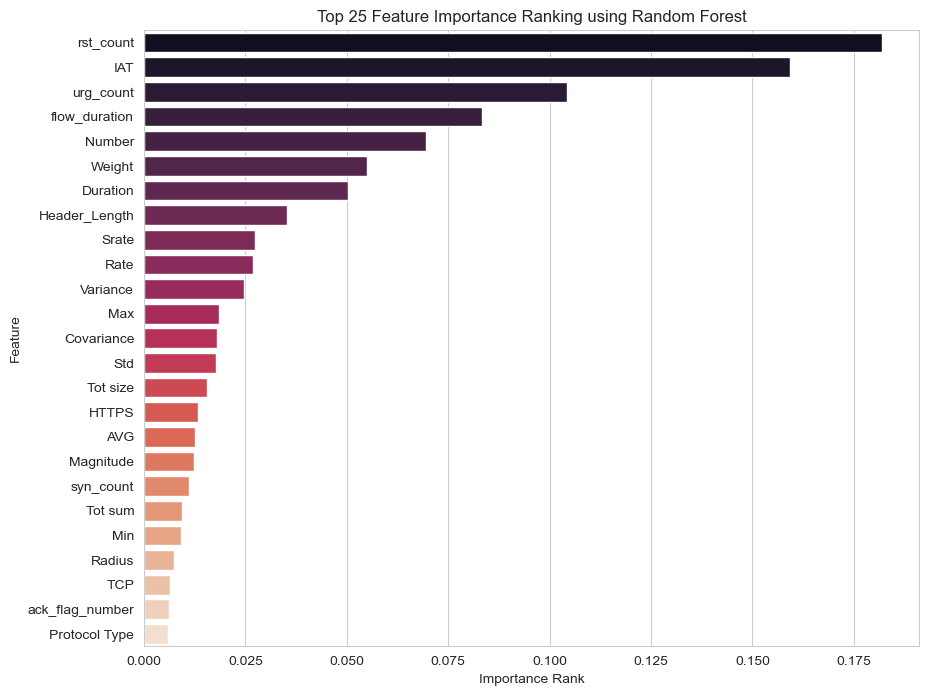

In [19]:
# Sort the DataFrame by importance (descending order)
top_25 = top_25_features_rf.sort_values(by='RF Importance', ascending=False)

# Set up the seaborn style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='RF Importance', y='Feature', data=top_25, palette='rocket')

# Set labels and title
plt.xlabel('Importance Rank')
plt.ylabel('Feature')
plt.title('Top 25 Feature Importance Ranking using Random Forest')

# Show plot
plt.show()


In [20]:
# Get the remaining features that were not selected in the top 25
unselected_rf = score_rf[~score_rf['Feature'].isin(top_25_features_rf['Feature'])]

# Convert remaining features to an array
unselected_rf_array = unselected_rf['Feature'].values

# Display the array
unselected_rf_array

array(['fin_count', 'ack_count', 'HTTP', 'UDP', 'psh_flag_number',
       'syn_flag_number', 'rst_flag_number', 'SSH', 'DNS', 'ICMP', 'IPv',
       'LLC', 'fin_flag_number', 'ARP', 'ece_flag_number',
       'cwr_flag_number', 'Drate', 'DHCP', 'IRC', 'Telnet', 'SMTP'],
      dtype=object)

### Extra Trees

In [21]:
# Sort features by importance for Extra Trees
sorted_indices_et = et_importances.argsort()[::-1]
top_25_indices_et = sorted_indices_et[:25]

# Get the corresponding feature names for Extra Trees (replace with your actual feature names)
top_25_features_et = [feature_names[i] for i in top_25_indices_et]

# Print the top 25 feature names from Extra Trees
print("\nTop 25 features from Extra Trees:")
for feature in top_25_features_et:
    print(feature)


Top 25 features from Extra Trees:
IAT
Weight
Variance
HTTPS
rst_count
Number
Duration
ack_flag_number
urg_count
flow_duration
Header_Length
psh_flag_number
Magnitude
Tot size
Std
syn_count
Max
Tot sum
AVG
Min
Srate
Radius
Rate
TCP
Protocol Type


In [22]:
# Create a DataFrame combining Random Forest feature names and scores
score_et = pd.DataFrame({
    'Feature': feature_names,
    'ET Importance': et_importances
})

#Sort the DataFrame by importance (descending order)
score_et = score_et.sort_values(by='ET Importance', ascending=False)

# Get the top 25 features
top_25_features_et = score_et.head(25)
top_25_features_et

,Feature,ET Importance
39,IAT,0.224020
45,Weight,0.095402
44,Variance,0.087906
20,HTTPS,0.064412
18,rst_count,0.057968
40,Number,0.047317
3,Duration,0.044757
11,ack_flag_number,0.034929
17,urg_count,0.032676
0,flow_duration,0.026322


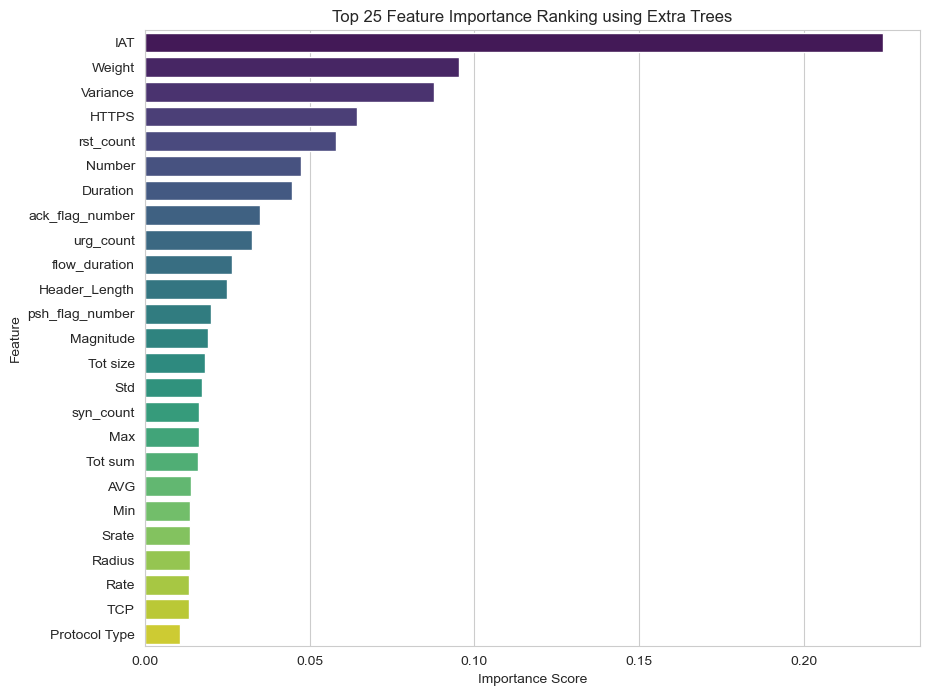

In [23]:
# Sort the DataFrame by importance (descending order)
top_25_et = top_25_features_et.sort_values(by='ET Importance', ascending=False)

# Set up the seaborn style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='ET Importance', y='Feature', data=top_25_et, palette='viridis')

# Set labels and title
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 25 Feature Importance Ranking using Extra Trees')

# Show plot
plt.show()


In [24]:
# Get the remaining features that were not selected in the top 25
unselected_et = score_et[~score_et['Feature'].isin(top_25_features_et['Feature'])]

# Convert remaining features to an array
unselected_et_array = unselected_et['Feature'].values

# Display the array
unselected_et_array

array(['Covariance', 'syn_flag_number', 'ack_count', 'UDP',
       'rst_flag_number', 'fin_count', 'HTTP', 'ICMP', 'SSH',
       'fin_flag_number', 'DNS', 'IPv', 'LLC', 'ARP', 'ece_flag_number',
       'cwr_flag_number', 'DHCP', 'Drate', 'IRC', 'Telnet', 'SMTP'],
      dtype=object)